<a href="https://colab.research.google.com/github/Page0526/Pytorch-crash-course/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch WorkFlow

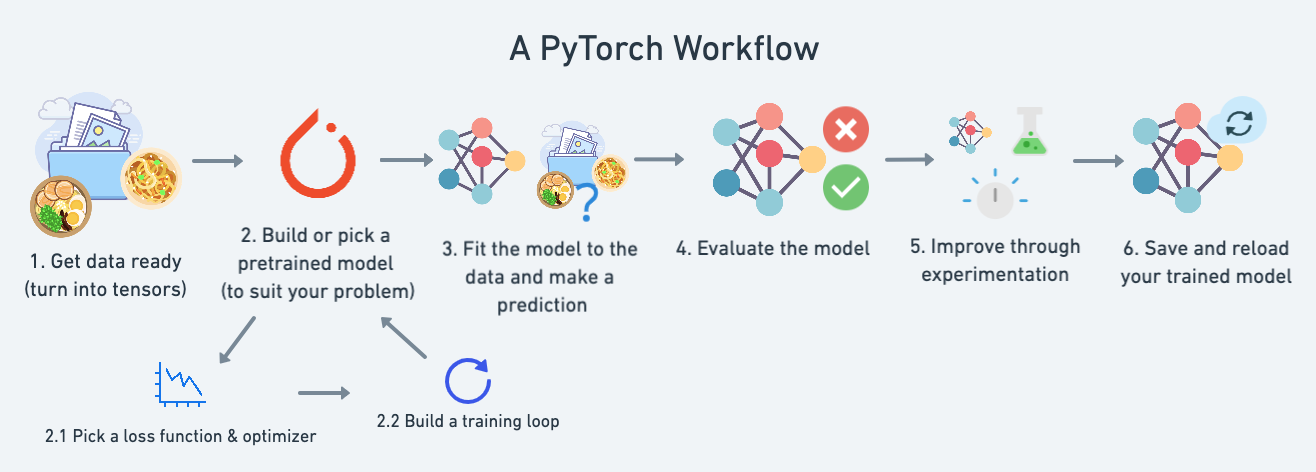

Machine learning is a game of 2 parts:
- Turn data into numbers
- Pick or build model to learn representation as best as possible

In [8]:
import matplotlib.pyplot as plt

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
X_unsqueeze = X.unsqueeze(dim=1)
X_unsq_one = X_unsqueeze.unsqueeze(dim=1)
X_unsq_two = X_unsqueeze.unsqueeze(dim=0)
X_unsq_three = X_unsqueeze.unsqueeze(dim=2)
y = weight * X_unsqueeze + bias

X_unsq_one[0:10], X_unsq_two[0:10], X_unsq_three[0:10]

(tensor([[[0.0000]],
 
         [[0.0200]],
 
         [[0.0400]],
 
         [[0.0600]],
 
         [[0.0800]],
 
         [[0.1000]],
 
         [[0.1200]],
 
         [[0.1400]],
 
         [[0.1600]],
 
         [[0.1800]]]),
 tensor([[[0.0000],
          [0.0200],
          [0.0400],
          [0.0600],
          [0.0800],
          [0.1000],
          [0.1200],
          [0.1400],
          [0.1600],
          [0.1800],
          [0.2000],
          [0.2200],
          [0.2400],
          [0.2600],
          [0.2800],
          [0.3000],
          [0.3200],
          [0.3400],
          [0.3600],
          [0.3800],
          [0.4000],
          [0.4200],
          [0.4400],
          [0.4600],
          [0.4800],
          [0.5000],
          [0.5200],
          [0.5400],
          [0.5600],
          [0.5800],
          [0.6000],
          [0.6200],
          [0.6400],
          [0.6600],
          [0.6800],
          [0.7000],
          [0.7200],
          [0.7400],
          

In [4]:
X_unsqueeze[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

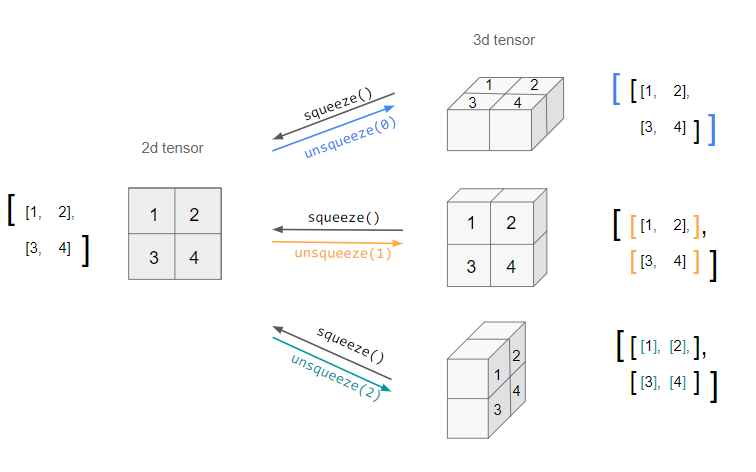

In [20]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [19]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    prediction=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # plot train data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label='Training data')
  # plot test data in green
  plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

  if prediction is not None:
    # plot prediction in red
    plt.scatter(test_data, prediction, c='r', s=4, label='Prediction')

  plt.legend(prop={'size':14})

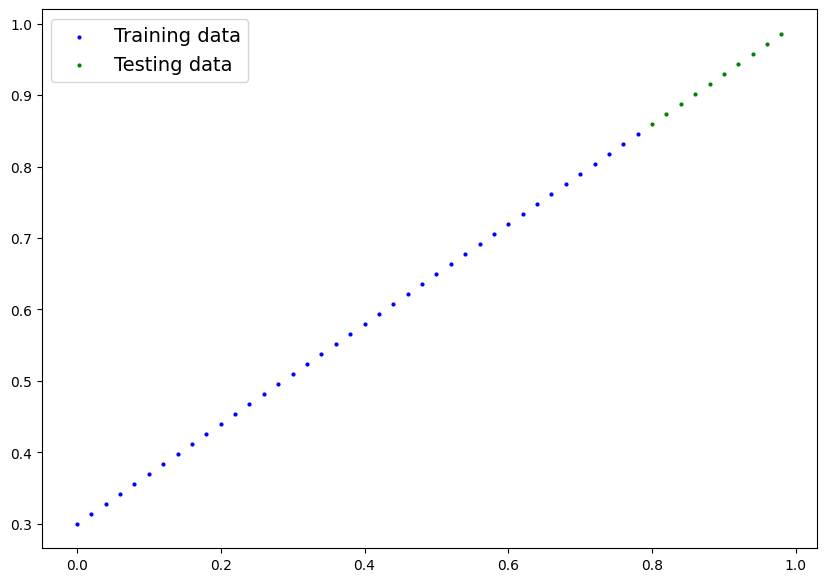

In [10]:
plot_prediction()

In [12]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [13]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# torc.inference_mode() & torch.no_grad() basically the same but inference_mode() is newer -> faster & preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [17]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


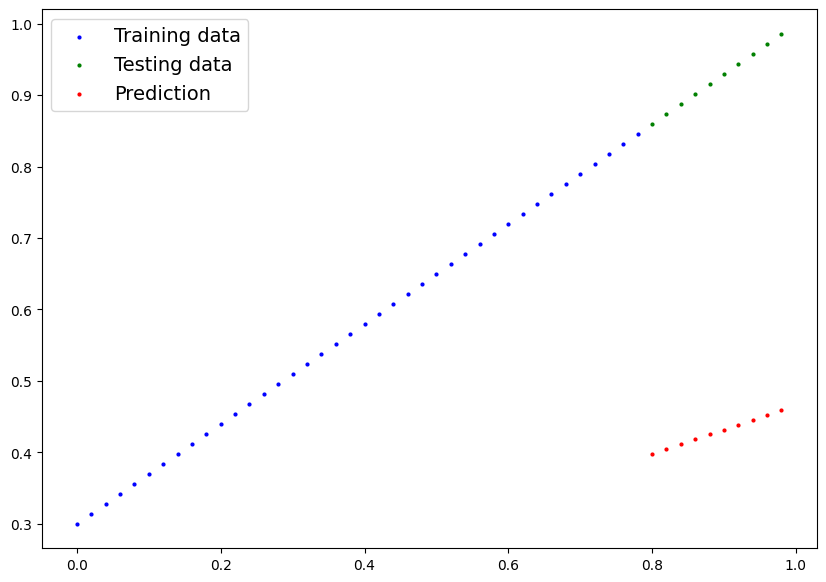

In [23]:
plot_prediction(prediction=y_preds)

## Creat a loss function and optimizer in Pytorch

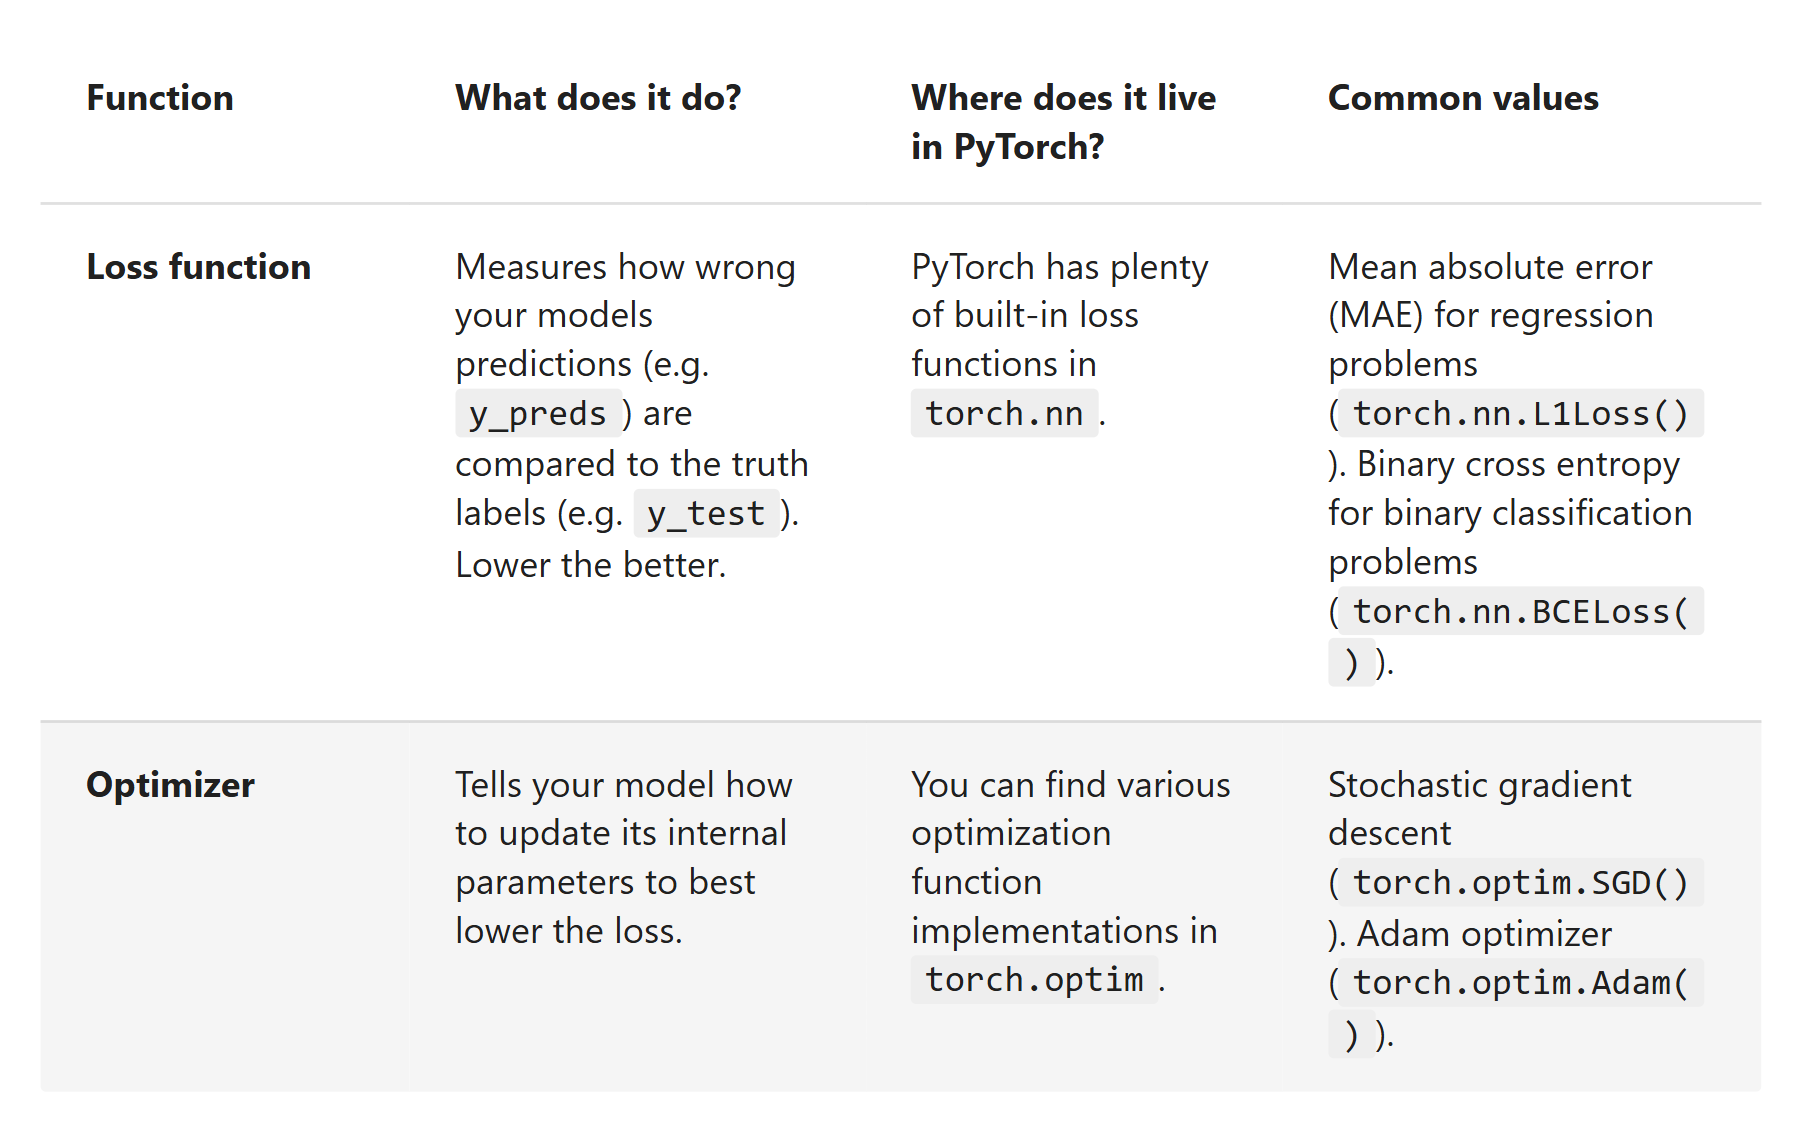

In [24]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### Pytorch optimization loops song
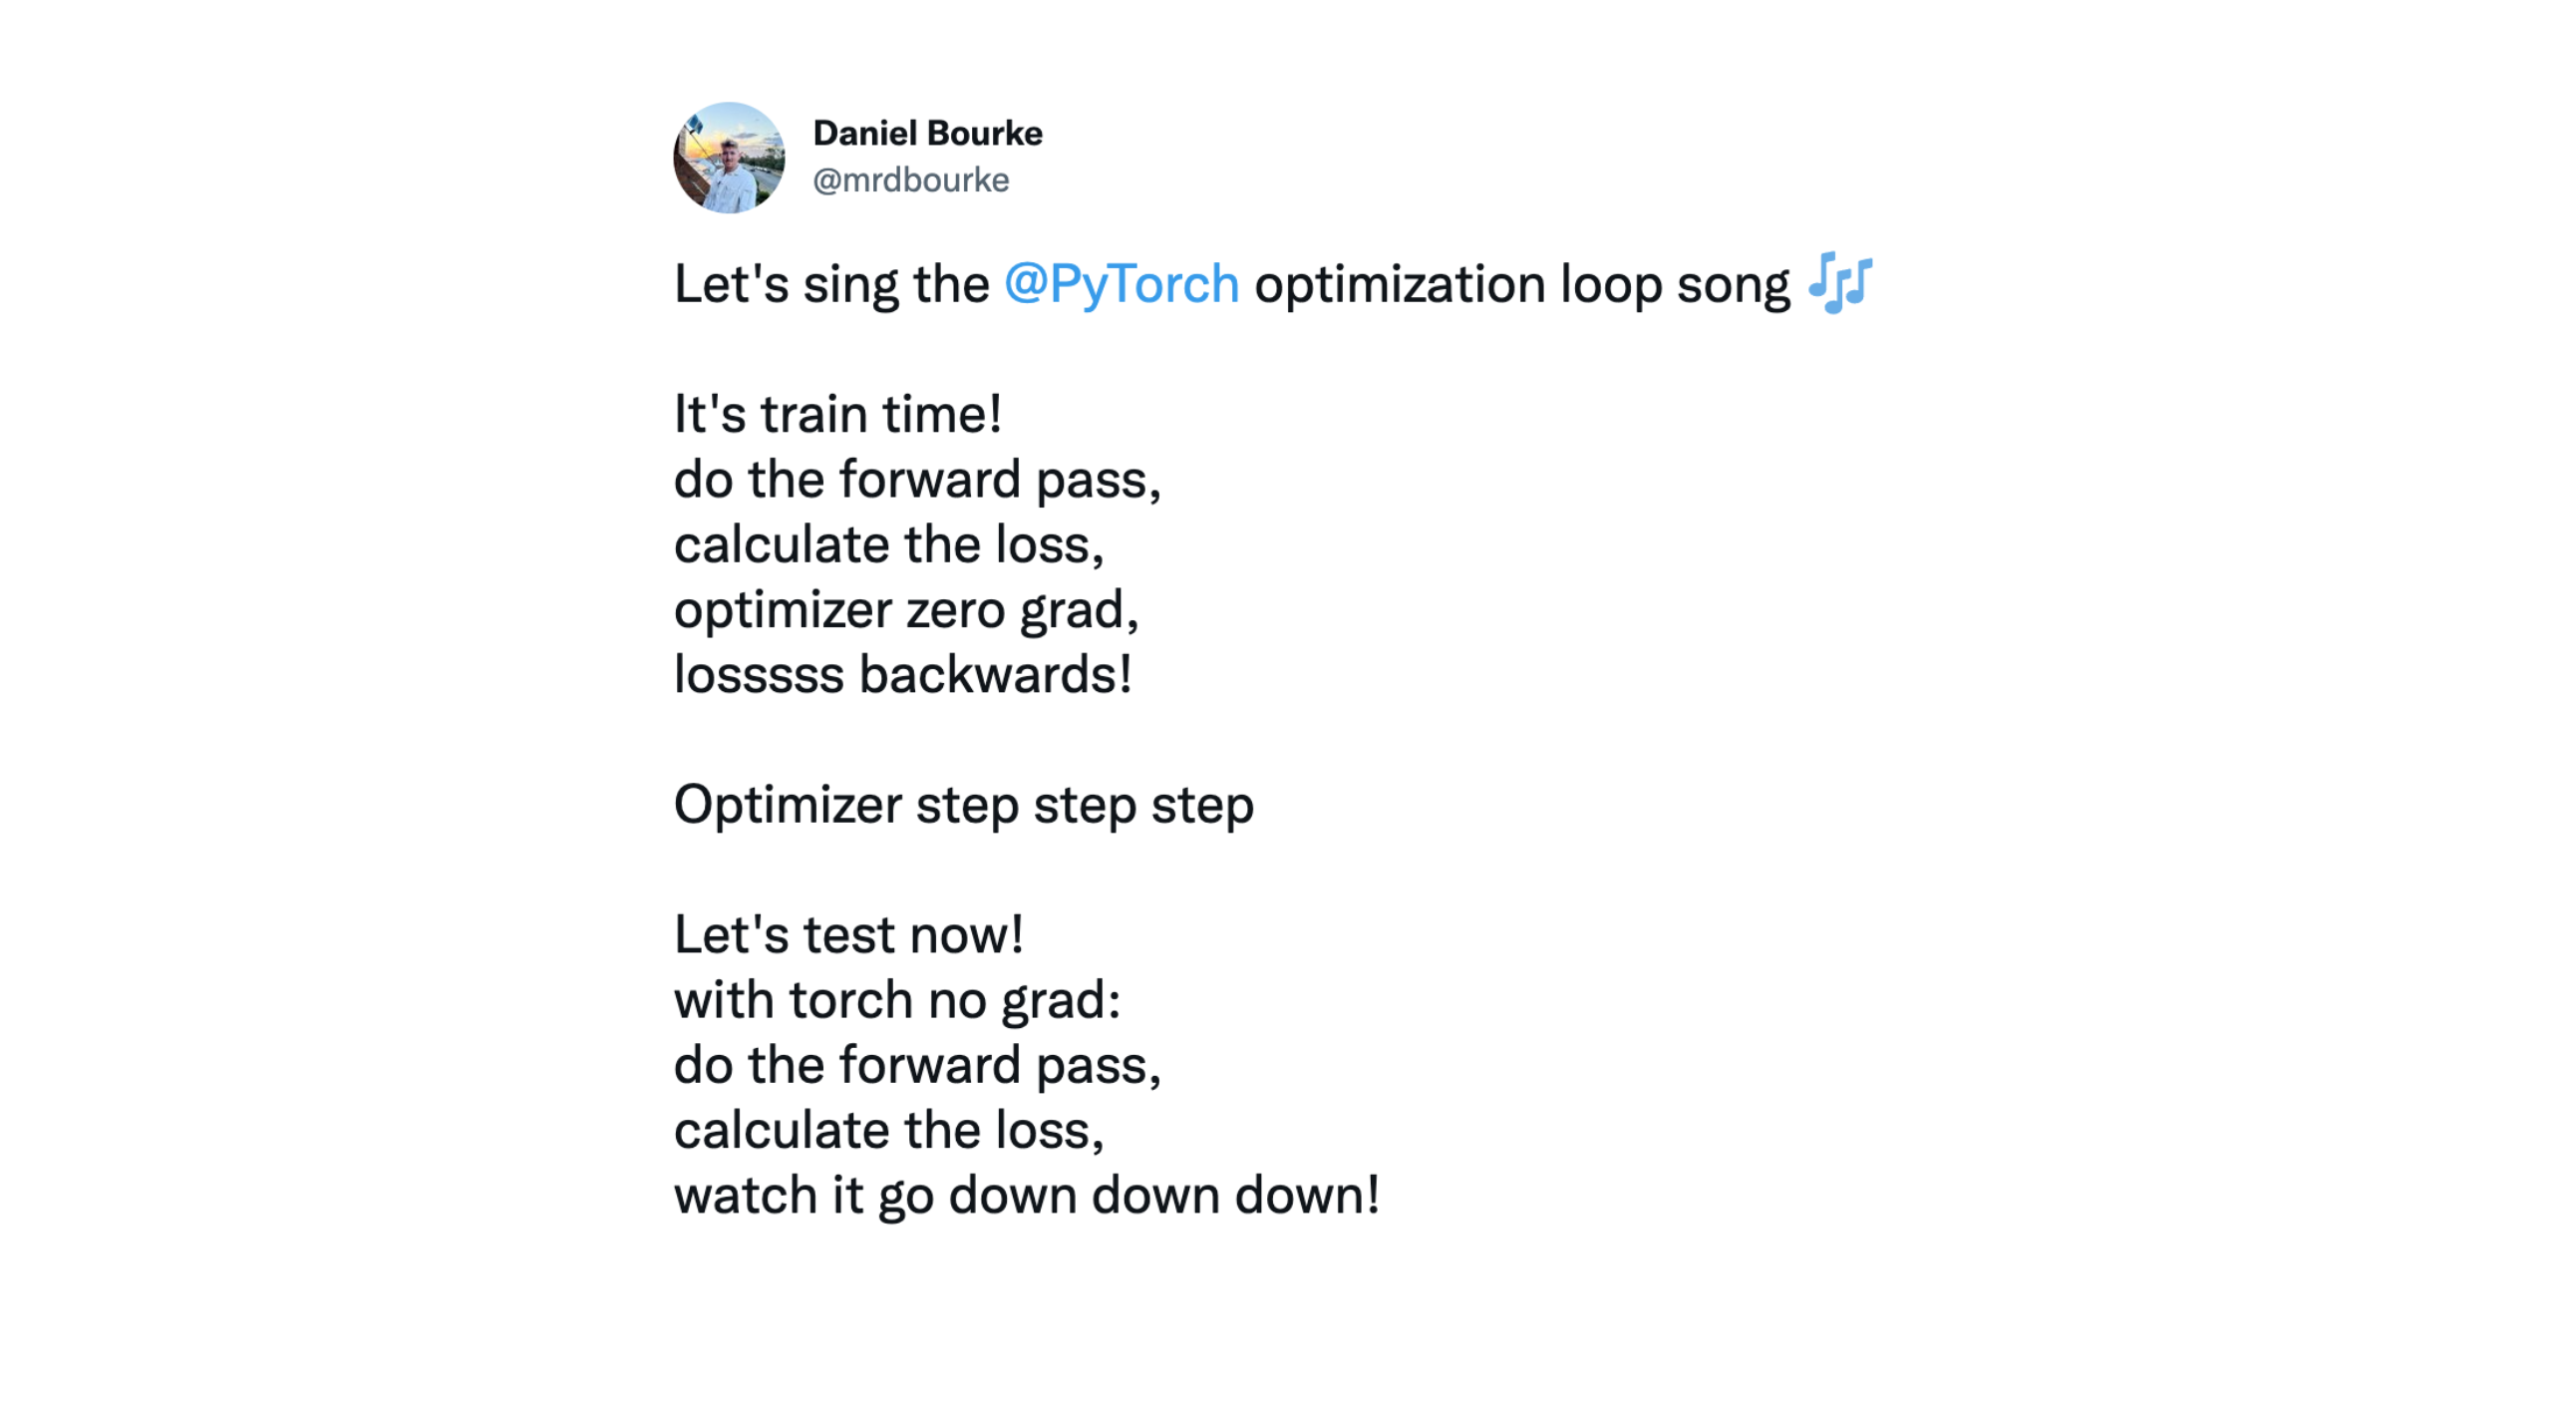

In [27]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.15381298959255219 | MAE Test Loss: 0.17303712666034698 
Epoch: 10 | MAE Train Loss: 0.15334169566631317 | MAE Test Loss: 0.17424748837947845 
Epoch: 20 | MAE Train Loss: 0.1529010832309723 | MAE Test Loss: 0.1759827584028244 
Epoch: 30 | MAE Train Loss: 0.1524759829044342 | MAE Test Loss: 0.1778288334608078 
Epoch: 40 | MAE Train Loss: 0.15208052098751068 | MAE Test Loss: 0.18019874393939972 
Epoch: 50 | MAE Train Loss: 0.15169595181941986 | MAE Test Loss: 0.18274933099746704 
Epoch: 60 | MAE Train Loss: 0.15131139755249023 | MAE Test Loss: 0.18529994785785675 
Epoch: 70 | MAE Train Loss: 0.15093356370925903 | MAE Test Loss: 0.187902569770813 
Epoch: 80 | MAE Train Loss: 0.15058135986328125 | MAE Test Loss: 0.19039367139339447 
Epoch: 90 | MAE Train Loss: 0.150239035487175 | MAE Test Loss: 0.19285960495471954 
Epoch: 100 | MAE Train Loss: 0.1499040275812149 | MAE Test Loss: 0.19536657631397247 
Epoch: 110 | MAE Train Loss: 0.14958420395851135 | MAE Test Los

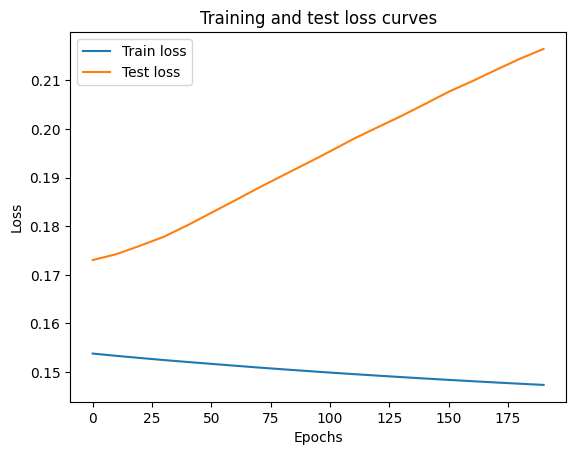

In [28]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [29]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.2733])), ('bias', tensor([0.4614]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [30]:
from pathlib import Path
# create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)
# create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [31]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jul 12 16:46 models/01_pytorch_workflow_model_0.pth


# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [11]:
# Import necessary libraries
import torch
from torch import nn
import mathplotlib.pyplot as plt

In [33]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [39]:
# Create the data parameters
weight=0.3
bias=0.9
# Make X and y using linear regression feature
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [40]:
# Split the data into training and testing
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [41]:
# Plot the training and testing data
def plot_prediction(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    prediction = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c = 'b', s=4, label='Training data')
  plt.scatter(test_data, test_label, c='g', s=4, label='Test data')

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4,label='Prediction')
  # Show the legend
  plt.legend(prop={"size": 14});

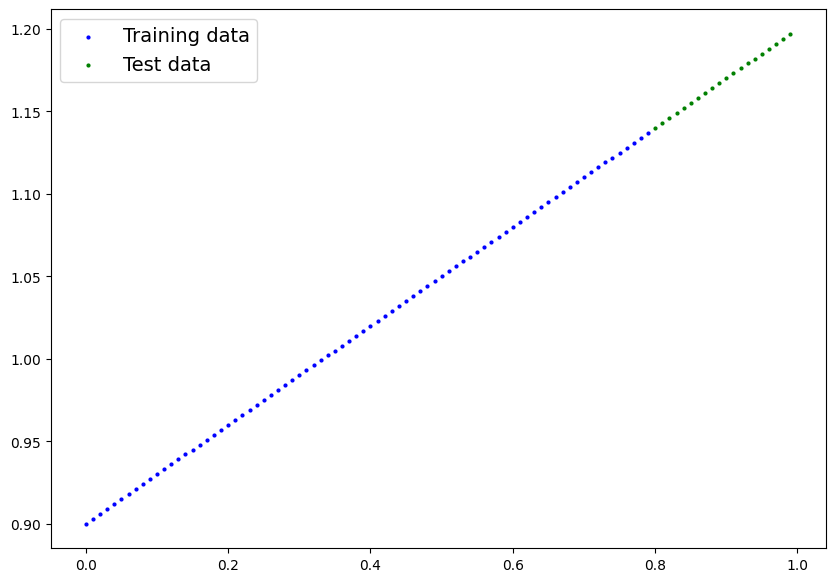

In [42]:
plot_prediction()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [59]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegress(nn.Module):
  def __init__(self):
    super().__init__()
    # in_features = number of dimension your input has
    # out_features = number of dimension your output has
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x):
    return self.linear_layer(x)

In [60]:
# Instantiate the model and put it to the target device
torch.manual_seed(30)
model = LinearRegress()
model.to(device)
next(model.parameters()).device, model, model.state_dict()

(device(type='cpu'),
 LinearRegress(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8015]])),
              ('linear_layer.bias', tensor([0.4927]))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [61]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [62]:
# Training loop
torch.manual_seed(30)

# Train model for 300 epochs
epochs = 300
# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
      model.eval()
      # 1. Forward pass
      with torch.inference_mode():
        test_pred = model(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.209 | Test loss: 0.055
Epoch: 20 | Train loss: 0.118 | Test loss: 0.194
Epoch: 40 | Train loss: 0.104 | Test loss: 0.223
Epoch: 60 | Train loss: 0.097 | Test loss: 0.220
Epoch: 80 | Train loss: 0.090 | Test loss: 0.208
Epoch: 100 | Train loss: 0.083 | Test loss: 0.192
Epoch: 120 | Train loss: 0.076 | Test loss: 0.177
Epoch: 140 | Train loss: 0.070 | Test loss: 0.162
Epoch: 160 | Train loss: 0.063 | Test loss: 0.147
Epoch: 180 | Train loss: 0.056 | Test loss: 0.131
Epoch: 200 | Train loss: 0.049 | Test loss: 0.115
Epoch: 220 | Train loss: 0.042 | Test loss: 0.099
Epoch: 240 | Train loss: 0.035 | Test loss: 0.083
Epoch: 260 | Train loss: 0.028 | Test loss: 0.066
Epoch: 280 | Train loss: 0.022 | Test loss: 0.050


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [63]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[1.1678],
        [1.1716],
        [1.1753],
        [1.1790],
        [1.1828],
        [1.1865],
        [1.1902],
        [1.1940],
        [1.1977],
        [1.2014],
        [1.2052],
        [1.2089],
        [1.2126],
        [1.2164],
        [1.2201],
        [1.2238],
        [1.2276],
        [1.2313],
        [1.2350],
        [1.2388]])

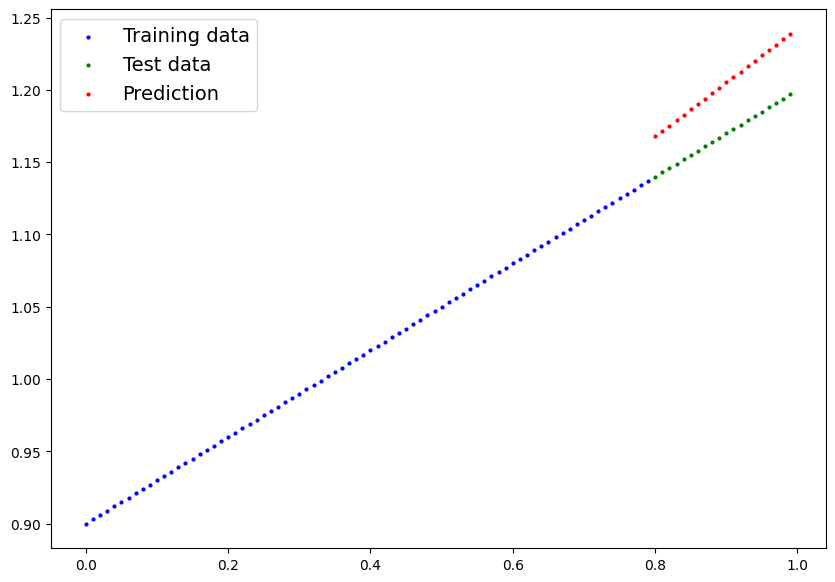

In [64]:
# Plot the predictions (these may need to be on a specific device)
plot_prediction(prediction = y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [72]:
from pathlib import Path

# 1. Create models directory
ModelPath = Path("models")
ModelPath.mkdir(parents = True,exist_ok = True)

# 2. Create model save path
ModelName = "01_pytorch_workflow_model_0.pth"
ModelSavePath = ModelPath / ModelName
# 3. Save the model state dict
print(f"Saving model to: {ModelSavePath}")
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [73]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1744 Jul 12 17:50 models/01_pytorch_workflow_model_0.pth


In [74]:
# Make predictions with loaded model and compare them to the previous
load_model = LinearRegress()
load_model.load_state_dict(torch.load(f=ModelSavePath))
load_model.to(device)

LinearRegress(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)